# **Introduction to classification**


## **Introduction**

In this notebook we will perform **two-class classification** using **logistic regression**. A classifier is a machine learning model that separates the **label** into categories or **classes**. In other words, classification models are **supervised** machine learning models which predict a categorical label.

we are using titanic survival data for this exercise. Using passenger profile information, we are trying to predict which passenger was having better chance of survival.

Logistic regression is a linear model but with a nonlinear response. The response is binary, $\{ 0,1 \}$, or positive and negative. The response is the prediction of the category. 

In this notebook you will learn the following: 
-  How to prepare data for classification models using scikit-learn. 
-  Constructing a classification model using scikit-learn.
-  Evaluating the performance of the classification model. 
-  Using techniques such as reweighting the labels and changing the decision threshold to change the trade-off between false positive and false negative error rates. 

## **Basics of logistic regression**

In this section some basic properties of the logistic regression model are presented. 

First, execute the code in the cell below to load the packages required  to run this notebook. 

In [2]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Setting the path
import os
os.chdir("/content/drive/My Drive/Data_Science_Python/dataset/titanic")

In [4]:
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Checking version
print("Version of Numpy :", np.__version__)
print("Version of Pandas :", pd.__version__)
print("Version of matplotlib :", matplotlib.__version__)
print("Version of Seaborn :", sns.__version__)
print("Version of Scipy :", scipy.__version__)

Version of Numpy : 1.18.5
Version of Pandas : 1.0.5
Version of matplotlib : 3.2.2
Version of Seaborn : 0.10.1
Version of Scipy : 1.4.1


Logistic regression is widely used as a classification model. Logistic regression is linear model, with a binary response, `{False, True}` or `{0, 1}`. We can think of this response as having a Binomial distribution. For linear regression the response is just, well, linear. Logistic regression is a linear regression model with a nonlinear output. The response of the linear model is transformed or 'squashed' to values close to 0 and 1 using a **sigmoidal function**, also known as the **logistic function**. The result of this transformation is a response which is the log likelihood for each of the two classes. 

The sigmoidal or logistic function can be expressed as follows:

$$f(x) = \frac{1}{1 + e^{-\kappa(x - x_0)}} \\
\kappa = steepness$$

Execute the code in the cell below to compute and plot an example of the logistic function.

In [1]:
xseq = np.arange(-7, 7, 0.1)

logistic = [math.exp(v)/(1 + math.exp(v)) for v in xseq]

plt.plot(xseq, logistic, color = 'red');
plt.plot([-7,7], [0.5,0.5], color = 'blue')
plt.plot([0,0], [0,1], color = 'blue')
plt.title('Logistic function for two-class classification')
plt.ylabel('log likelihood')
plt.xlabel('Value of output from linear regression');

NameError: ignored

Let's make this a bit more concrete with a simple example. Say we have a linear model:

$$\hat{y} = \beta_0 + \beta_1\ x$$

Now, depending on the value of $\hat{y}$ we want to classify the output from a logistic regression model as either `0` or `1`. Substituting the linear model into the logistic function creates the following expression:

$$F(\hat{y}) = \frac{1}{1 + e^{-\kappa(\beta_0 + \beta_1\ x)}} $$

In this way we transform the continuous output of the linear model defined on $-\infty \le \hat{y} \le \infty$ to a binary response, $0 \le F(\hat{y}) \le 1$.

## **Load and prepare the data set**

As a first step, load the dataset.

In [ ]:
# load the dataset
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [ ]:
# Shape of data
print("No of rows and columns in train :", train.shape)
print("No of rows and columns in test :", test.shape)

No of rows and columns in train : (891, 12)
No of rows and columns in test : (418, 11)


In [ ]:
# Variable information
print("Variable Structure of train :")
print(" ")
train.dtypes

Variable Structure of train :
 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Top 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


There are 12 columns in train data, 1 identifier column, 10 features, plus a label column. These features represent information for each passengers.

There is one other aspect of this data set which you should be aware of. The label has some **class imbalance**. Class imbalance means that there are  unequal numbers of cases for the categories of the label. 

To examine the class imbalance in these data, execute the code in the cell below.

In [ ]:
# Checking class imbalance
print(train['Survived'].value_counts())
print(" ")
print(train['Survived'].value_counts(normalize = True))

0    549
1    342
Name: Survived, dtype: int64
 
0   0.62
1   0.38
Name: Survived, dtype: float64


Notice that only 38% of the passenger has survived. This is not surprising, given the nature of disaster. However, this imbalance will bias the training of any model. 

In [ ]:
# Descriptive statistics
# descriptive statistics function
def descriptive_stats_numeric(data):
  
  # Descriptive statistics
  descriptive_statistics = pd.DataFrame(data.drop(['PassengerId'],axis = 1).describe().transpose()).reset_index()
  # Renaming columns
  descriptive_statistics.columns = ['Variable', 'Count', 'Average', 'Std dev', 'Minimum', '1st quartile',
                                  'Median', '3rd quartile', 'Maximum']
  # Missing Percentage summary
  descriptive_statistics['Missing Percent'] = 100 - round(descriptive_statistics['Count']/len(data)*100,2)
  # Calculating IQR
  descriptive_statistics['IQR'] = descriptive_statistics['3rd quartile'] - descriptive_statistics['1st quartile']

  # CV
  descriptive_statistics['CV'] = descriptive_statistics['Std dev']/descriptive_statistics['Average']
  # Unique summary
  unique_summary = pd.DataFrame(data.nunique()).reset_index()
  unique_summary.columns = ['Variable', 'Unique Counts']
  
  # skewness and kurtosis summary
  Skewness = pd.DataFrame(data.skew()).reset_index()
  Skewness.columns = ['Variable', 'Skewness']

  Kurtosis = pd.DataFrame(data.kurt()).reset_index()
  Kurtosis.columns = ['Variable', 'Kurtosis']

  descriptive_statistics = pd.merge(descriptive_statistics, unique_summary, on = 'Variable', how = 'left')
  descriptive_statistics = pd.merge(descriptive_statistics, Skewness, on = 'Variable', how = 'left')
  descriptive_statistics = pd.merge(descriptive_statistics, Kurtosis, on = 'Variable', how = 'left')

  # Rearranging columns
  descriptive_statistics = descriptive_statistics[['Variable', 'Count', 'Unique Counts','Missing Percent', 
                                                   'Minimum', 'Maximum', 'Average', 'Std dev', 'CV', 'Skewness',
                                                   'Kurtosis', 'Median','1st quartile','3rd quartile', 'IQR']]
  return descriptive_statistics

#Categorical data
def descriptive_stats_categorical(data):

  # Descriptive statistics
  descriptive_statistics_cat = pd.DataFrame(data.describe(include = 'object').transpose()).reset_index()
  # Renaming columns
  descriptive_statistics_cat.columns = ['Variable', 'Count', 'Unique categories', 'Top Categories',
                                        'Top Categories_count']
  # Missing Percentage summary
  descriptive_statistics_cat['Missing Percent'] = 100 - descriptive_statistics_cat['Count']/len(data)*100

  # Unique summary
  unique_summary = pd.DataFrame(data.nunique()).reset_index()
  unique_summary.columns = ['Variable', 'Unique Counts']

  descriptive_statistics_cat = pd.merge(descriptive_statistics_cat, unique_summary, on = 'Variable', how = 'left')
  # Rearranging columns
  descriptive_statistics_cat = descriptive_statistics_cat[['Variable', 'Count', 'Unique Counts', 
                                                           'Missing Percent', 'Unique categories',
                                                           'Top Categories','Top Categories_count']]
  return descriptive_statistics_cat

In [ ]:
descriptive_statistics_numeric = descriptive_stats_numeric(train)
descriptive_statistics_numeric

,Variable,Count,Unique Counts,Missing Percent,Minimum,Maximum,Average,Std dev,CV,Skewness,Kurtosis,Median,1st quartile,3rd quartile,IQR
0,Survived,891.00,2,0.00,0.00,1.00,0.38,0.49,1.27,0.48,-1.78,0.00,0.00,1.00,1.00
1,Pclass,891.00,3,0.00,1.00,3.00,2.31,0.84,0.36,-0.63,-1.28,3.00,2.00,3.00,1.00
2,Age,714.00,88,19.87,0.42,80.00,29.70,14.53,0.49,0.39,0.18,28.00,20.12,38.00,17.88
3,SibSp,891.00,7,0.00,0.00,8.00,0.52,1.10,2.11,3.70,17.88,0.00,0.00,1.00,1.00
4,Parch,891.00,7,0.00,0.00,6.00,0.38,0.81,2.11,2.75,9.78,0.00,0.00,0.00,0.00
5,Fare,891.00,248,0.00,0.00,512.33,32.20,49.69,1.54,4.79,33.40,14.45,7.91,31.00,23.09


In [ ]:
descriptive_statistics_cat = descriptive_stats_categorical(train)
descriptive_statistics_cat

,Variable,Count,Unique Counts,Missing Percent,Unique categories,Top Categories,Top Categories_count
0,Name,891,891,0.00,891,"Sivic, Mr. Husein",1
1,Sex,891,2,0.00,2,male,577
2,Ticket,891,681,0.00,681,347082,7
3,Cabin,204,147,77.10,147,B96 B98,4
4,Embarked,889,3,0.22,3,S,644


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


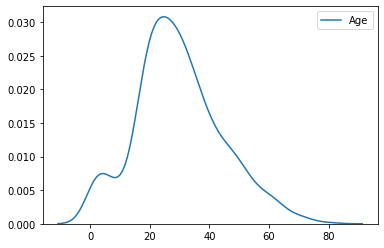

In [ ]:
# Checking distribution of Age
sns.kdeplot(train['Age']);

# **Pre steps for Machine learning**

In order to perform any machine learning task, there are some steps which need to perform beforehand. These steps are:

 + Creating X and y
 + Splitting data into train, validation and test
 + Transforming categorical variables
 + Feature scaling for numerical variables

## **Creating X and y**

In [ ]:
# Creating X and y
X = train.drop(['PassengerId', 'Survived'], axis = 1)
y = train['Survived']

print("Shape of X :", X.shape)
print("Shape of y :", y.shape)

Shape of X : (891, 10)
Shape of y : (891,)


## **Splitting data into train, validation and test**

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [ ]:
# Checking distribution of training, validation and test set

sample_type = ['train','validation','test']
sample_size = [len(X_train), len(X_validation), len(X_test)]

sample_size_df = pd.DataFrame()
sample_size_df['sample_type'] = sample_type
sample_size_df['total_sample'] = len(X)
sample_size_df['sample_size'] = sample_size
sample_size_df['sample_dist'] = sample_size_df['sample_size']/sample_size_df['total_sample']*100
sample_size_df

,sample_type,total_sample,sample_size,sample_dist
0,train,891,623,69.92
1,validation,891,134,15.04
2,test,891,134,15.04


## **Missing value imputation**

### **Categorical variables**

In [ ]:
# list of categorical variables
cat_var = X_train.select_dtypes(include = ['object']).columns.tolist()
print(cat_var)

print("Missing values in X_train :", X_train[cat_var].isnull().sum().sum())
print("Missing values in X_validation :", X_validation[cat_var].isnull().sum().sum())
print("Missing values in X_test :", X_test[cat_var].isnull().sum().sum())
print(" ")

X_train[cat_var] = X_train[cat_var].fillna('Unknown')
X_validation[cat_var] = X_validation[cat_var].fillna('Unknown')
X_test[cat_var] = X_test[cat_var].fillna('Unknown')

print("Missing values in X_train :", X_train[cat_var].isnull().sum().sum())
print("Missing values in X_train :", X_validation[cat_var].isnull().sum().sum())
print("Missing values in X_train :", X_test[cat_var].isnull().sum().sum())

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Missing values in X_train : 473
Missing values in X_validation : 109
Missing values in X_test : 107
 
Missing values in X_train : 0
Missing values in X_train : 0
Missing values in X_train : 0


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### **Numerical variables**

In [ ]:
# Missing value imputation for categorical variables

# list of categorical variables
num_var = X_train.select_dtypes(include = ['int', 'float']).columns.tolist()
print(num_var)

print("Missing values in X_train :", X_train[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_validation[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_test[num_var].isnull().sum().sum())
print(" ")

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(X_train[num_var])
X_train[num_var] = imputer.transform(X_train[num_var])
X_validation[num_var] = imputer.transform(X_validation[num_var])
X_test[num_var] = imputer.transform(X_test[num_var])

print("Missing values in X_train :", X_train[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_validation[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_test[num_var].isnull().sum().sum())

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Missing values in X_train : 121
Missing values in X_train : 26
Missing values in X_train : 30
 
Missing values in X_train : 0
Missing values in X_train : 0
Missing values in X_train : 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## **Transforming categorical variables**

In [ ]:
# Encoding categorical data
cat_var = ['Sex', 'Embarked']
temp = pd.get_dummies(X_train[cat_var])
X_train = X_train.drop(cat_var, axis = 1)
X_train = pd.concat([X_train, temp], axis = 1)
X_train.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
857,1.00,"Daly, Mr. Peter Denis",51.00,0.00,0.00,113055,26.55,E17,0,1,0,0,1,0
52,1.00,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.00,1.00,0.00,PC 17572,76.73,D33,1,0,1,0,0,0
386,3.00,"Goodwin, Master. Sidney Leonard",1.00,5.00,2.00,CA 2144,46.90,Unknown,0,1,0,0,1,0
124,1.00,"White, Mr. Percival Wayland",54.00,0.00,1.00,35281,77.29,D26,0,1,0,0,1,0
578,3.00,"Caram, Mrs. Joseph (Maria Elias)",29.00,1.00,0.00,2689,14.46,Unknown,1,0,1,0,0,0


In [ ]:
X_train = X_train.drop(['Name','Cabin', 'Ticket'], axis = 1)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
857,1.00,51.00,0.00,0.00,26.55,0,1,0,0,1,0
52,1.00,49.00,1.00,0.00,76.73,1,0,1,0,0,0
386,3.00,1.00,5.00,2.00,46.90,0,1,0,0,1,0
124,1.00,54.00,0.00,1.00,77.29,0,1,0,0,1,0
578,3.00,29.00,1.00,0.00,14.46,1,0,1,0,0,0


In [ ]:
# Encoding categorical data
temp = pd.get_dummies(X_validation[cat_var])
X_validation = X_validation.drop(cat_var, axis = 1)
X_validation = X_validation.drop(['Name','Cabin', 'Ticket'], axis = 1)
X_validation = pd.concat([X_validation, temp], axis = 1)

# Get missing columns in the training test
feature_list_train = set(X_train.columns)
no_features = len(feature_list_train)
feature_list_validation = set(X_validation.columns)
missing_cols_validation = feature_list_train - feature_list_validation

# Add a missing column in test set with default value equal to 0
for c in missing_cols_validation:
    X_validation[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_validation = X_validation[X_train.columns]
print(no_features)
X_validation.head()

11


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
693,3.00,25.00,0.00,0.00,7.22,0,1,1,0,0,0
310,1.00,24.00,0.00,0.00,83.16,1,0,1,0,0,0
740,1.00,29.00,0.00,0.00,30.00,0,1,0,0,1,0
674,2.00,29.00,0.00,0.00,0.00,0,1,0,0,1,0
822,1.00,38.00,0.00,0.00,0.00,0,1,0,0,1,0


In [ ]:
# Encoding categorical data
temp = pd.get_dummies(X_test[cat_var])
X_test = X_test.drop(cat_var, axis = 1)
X_test = X_test.drop(['Name','Cabin', 'Ticket'], axis = 1)
X_test = pd.concat([X_test, temp], axis = 1)

feature_list_test = set(X_test.columns)
missing_cols_test = feature_list_train - feature_list_test

# Add a missing column in test set with default value equal to 0
for c in missing_cols_test:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
815,1.00,29.00,0.00,0.00,0.00,0,1,0,0,1,0
76,3.00,29.00,0.00,0.00,7.90,0,1,0,0,1,0
27,1.00,19.00,3.00,2.00,263.00,0,1,0,0,1,0
764,3.00,16.00,0.00,0.00,7.78,0,1,0,0,1,0
215,1.00,31.00,1.00,0.00,113.28,1,0,1,0,0,0


## **Feature scaling : numeric variables**

In [ ]:
# Standard scaler
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train[num_var] = sc.fit_transform(X_train[num_var])
X_validation[num_var] = sc.transform(X_validation[num_var])
X_test[num_var] = sc.transform(X_test[num_var])

In [ ]:
# save to npy file
np.save('X_train.npy', X_train)
np.save('X_validation.npy', X_validation)
np.save('X_test.npy', X_test)

np.save('y_train.npy', y_train)
np.save('y_validation.npy', y_validation)
np.save('y_test.npy', y_test)

print(X_train.columns.tolist())
print(X_validation.columns.tolist())
print(X_test.columns.tolist())

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown']
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown']
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown']


# **Model building**

## **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, penalty = 'none', solver = 'lbfgs')
LR = LR.fit(X_train, y_train)
LR

NameError: ignored

In [ ]:
print(LR.intercept_)
print(LR.coef_)

[3.33560075]
[[-2.15065671 -3.27894758 -3.13091982 -0.59694164  0.58085634  3.03976412
   0.29583663 -2.07753623 -2.06542414 -2.53124634 10.00980746]]


In [ ]:
probabilities = LR.predict_proba(X_validation)
print(probabilities[:15,:])

[[0.83120567 0.16879433]
 [0.03143752 0.96856248]
 [0.50918907 0.49081093]
 [0.75879811 0.24120189]
 [0.60891891 0.39108109]
 [0.14296123 0.85703877]
 [0.90137662 0.09862338]
 [0.77151103 0.22848897]
 [0.20952838 0.79047162]
 [0.88140604 0.11859396]
 [0.73668821 0.26331179]
 [0.96163129 0.03836871]
 [0.78541674 0.21458326]
 [0.89359346 0.10640654]
 [0.21695856 0.78304144]]


## **Score and evaluate the classification model**

Now that the class probabilities have been computed these values must be transformed into actual class scores. Recall that the log likelihoods for two-class logistic regression are computed by applying the sigmoid or logistic transformation to the output of the linear model. The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. A few examples along with the known labels are then displayed. Execute this code and examine the result.

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_validation[:15])

[0 1 0 0 0 1 0 0 1 0 0 0 0 0 1]
693    0
310    1
740    1
674    0
822    0
496    1
231    0
439    0
501    0
294    0
62     0
686    0
239    0
236    0
644    1
Name: Survived, dtype: int64


In [ ]:
y_predict = LR.predict(X_validation)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0])

In [ ]:
# Calculating null accuracy
null_accuracy = y_train.value_counts(normalize = True)[0]
print("Null accuracy of this model is :", round(null_accuracy,2))

Null accuracy of this model is : 0.61


In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
   
print_metrics(y_validation, y_predict)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        72                10
Actual negative        12                40

Accuracy  0.84
 
           Positive      Negative
Num case       82            52
Precision    0.86          0.80
Recall       0.88          0.77
F1           0.87          0.78


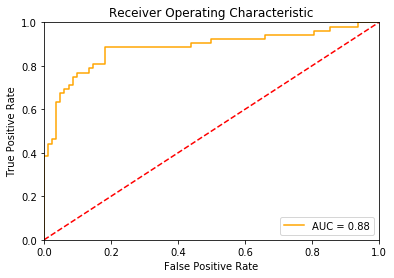

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_validation, probabilities)

In [ ]:
LR = LogisticRegression(random_state=0, penalty = 'none', solver = 'lbfgs', class_weight = {0:1, 1:2.5})
LR = LR.fit(X_train, y_train)
LR

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
probabilities = LR.predict_proba(X_validation)
print(probabilities[:15,:])

[[0.62579016 0.37420984]
 [0.01282654 0.98717346]
 [0.29930411 0.70069589]
 [0.55088827 0.44911173]
 [0.39888994 0.60111006]
 [0.06906252 0.93093748]
 [0.76741568 0.23258432]
 [0.56769477 0.43230523]
 [0.10937818 0.89062182]
 [0.72664556 0.27335444]
 [0.54637555 0.45362445]
 [0.91286974 0.08713026]
 [0.58800876 0.41199124]
 [0.77647985 0.22352015]
 [0.09543228 0.90456772]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive        67                15
Actual negative         6                46

Accuracy  0.84
 
           Positive      Negative
Num case       82            52
Precision    0.92          0.75
Recall       0.82          0.88
F1           0.86          0.81


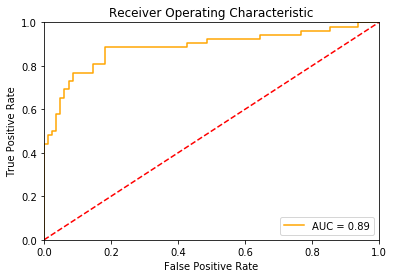

In [ ]:
scores = score_model(probabilities, 0.5)
print_metrics(y_validation, scores) 
plot_auc(y_validation, probabilities)

In [ ]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55]
for t in thresholds:
    test_threshold(probabilities, y_validation, t)


For threshold = 0.5
                 Confusion matrix
                 Score positive    Score negative
Actual positive        67                15
Actual negative         6                46

Accuracy  0.84
 
           Positive      Negative
Num case       82            52
Precision    0.92          0.75
Recall       0.82          0.88
F1           0.86          0.81

For threshold = 0.51
                 Confusion matrix
                 Score positive    Score negative
Actual positive        67                15
Actual negative         8                44

Accuracy  0.83
 
           Positive      Negative
Num case       82            52
Precision    0.89          0.75
Recall       0.82          0.85
F1           0.85          0.79

For threshold = 0.52
                 Confusion matrix
                 Score positive    Score negative
Actual positive        67                15
Actual negative         9                43

Accuracy  0.82
 
           Positive      Negative
Num cas

                 Confusion matrix
                 Score positive    Score negative
Actual positive        58                28
Actual negative        10                38

Accuracy  0.72
 
           Positive      Negative
Num case       86            48
Precision    0.85          0.58
Recall       0.67          0.79
F1           0.75          0.67


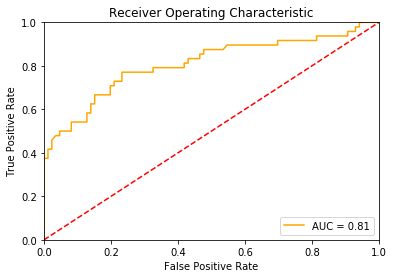

In [ ]:
probabilities = LR.predict_proba(X_test)
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)

# **Predicting Test data**

In [ ]:
test[cat_var] = test[cat_var].fillna('Unknown')
test[num_var] = imputer.transform(test[num_var])

temp = pd.get_dummies(test[cat_var])
test = test.drop(cat_var, axis = 1)
test = test.drop(['Name','Cabin', 'Ticket'], axis = 1)
test = pd.concat([test, temp], axis = 1)

# Get missing columns in the training test
feature_list_testdata = set(test.columns)
missing_cols_testdata = feature_list_train - feature_list_testdata

# Add a missing column in test set with default value equal to 0
for c in missing_cols_testdata:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[X_train.columns]

In [ ]:
test[num_var] = sc.transform(test[num_var])

In [ ]:
score_test = LR.predict(test)
score_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
test_final = pd.read_csv("./test.csv")
test_final = test_final[['PassengerId']]
test_final['Survived'] = score_test
test_final.to_csv("./Titanic_Survialprediction_Logistics.csv", index = False)
test_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
